In [6]:
import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
data_dir = '/Users/dorisyu/meg_decoding/data_meg'
subj = "R2210"
dtype = "raw"


In [9]:
raws = []
for file in glob.glob(f'{data_dir}/{subj}/*{dtype}*.fif'):
    print(file)
    raws.append(mne.io.read_raw_fif(file, preload=True))
if raws != []:  
    raw = mne.concatenate_raws(raws)


/Users/dorisyu/meg_decoding/data_meg/R2210/R2210_Abstract_Block1_102924-raw.fif
Opening raw data file /Users/dorisyu/meg_decoding/data_meg/R2210/R2210_Abstract_Block1_102924-raw.fif...
    Range : 0 ... 1394999 =      0.000 ...  1394.999 secs
Ready.
Reading 0 ... 1394999  =      0.000 ...  1394.999 secs...
/Users/dorisyu/meg_decoding/data_meg/R2210/R2210_Abstract_Block2_102924-raw.fif
Opening raw data file /Users/dorisyu/meg_decoding/data_meg/R2210/R2210_Abstract_Block2_102924-raw.fif...
    Range : 0 ... 939999 =      0.000 ...   939.999 secs
Ready.
Reading 0 ... 939999  =      0.000 ...   939.999 secs...
/Users/dorisyu/meg_decoding/data_meg/R2210/R2210_Abstract_Block3_102924-raw.fif
Opening raw data file /Users/dorisyu/meg_decoding/data_meg/R2210/R2210_Abstract_Block3_102924-raw.fif...
    Range : 0 ... 619999 =      0.000 ...   619.999 secs
Ready.
Reading 0 ... 619999  =      0.000 ...   619.999 secs...


In [10]:
raw.filter(1, 40, method='iir')

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB



<Raw | R2210_Abstract_Block1_102924-raw.fif, 193 x 2955000 (2955.0 s), ~4.25 GB, data loaded>

Using matplotlib as 2D backend.


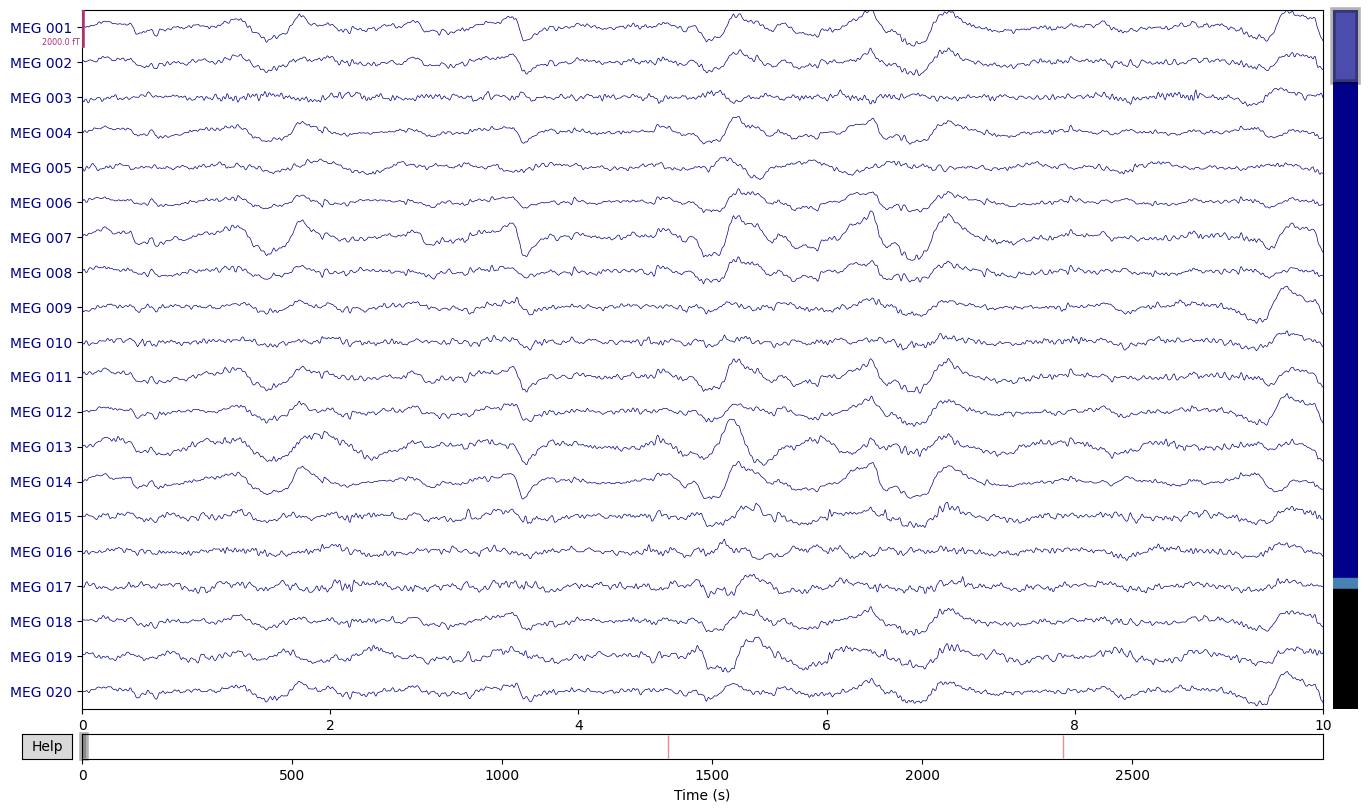

In [11]:
raw.plot()
input('Mark bads, press enter to continue')
print('bads : %s' % raw.info['bads'])


In [ ]:
raw.interpolate_bads()

In [ ]:
ica = mne.preprocessing.ICA(n_components=0.95, method='fastica')
print('fitting ica...')
ica.fit(raw, reject={'mag': 5e-12})
ica.plot_sources(raw)
input('press enter to see topos...')
ica.plot_components()

In [ ]:
print('excluding:', ica.exclude)
raw = ica.apply(raw, exclude=ica.exclude)